# Challenge 2

In [6]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.max_columns = None
'''
%matplotlib inline
'''

'\n%matplotlib inline\n'

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('data/titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [10]:
# your code here- numerical variable
select_numerical = titanic.select_dtypes(include=('float64', 'int64'))
select_numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [12]:
#your code here- categorical variable
select_categorical = titanic.select_dtypes(include='object')
select_categorical

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [4]:
# your code here
plt.style.use('classic')
plt.rcParams["figure.figsize"] = (12,6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

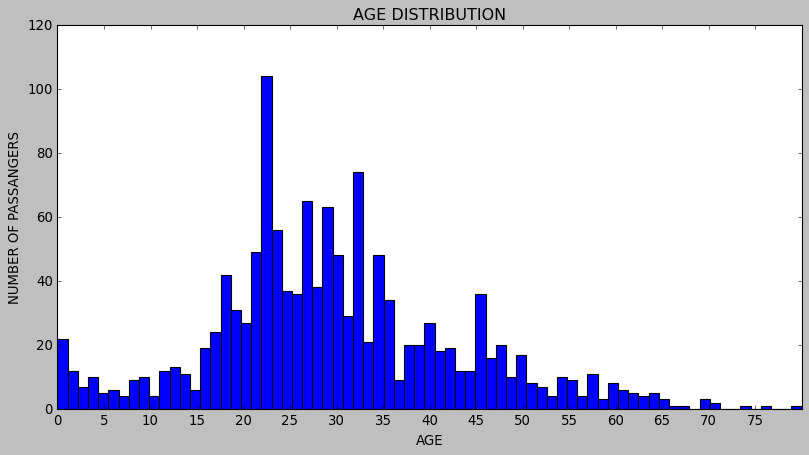

In [5]:
age = titanic['Age'].astype(dtype=int)
age_count = age.value_counts()
age_ages = age.unique()
tabla_age = plt.hist(age,
                    bins=len(age_ages))
plt.title('AGE DISTRIBUTION')
plt.xlabel("AGE")
plt.ylabel("NUMBER OF PASSANGERS")
plt.xticks(range(0,max(age_ages),5));

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

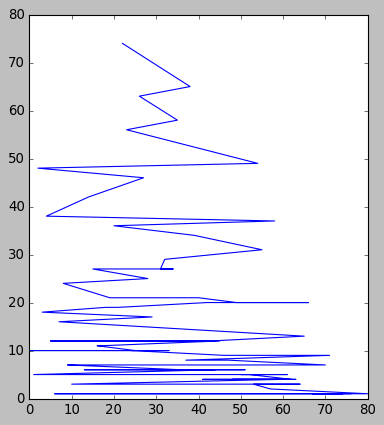

In [58]:
x=np.array(age_ages)
y=np.array(age_count)
plt.subplot(1,2,1)
plt.plot(x, y);

#### Whether the bin size affects your plot? Why?

In [2]:
"""
If bin is big or equal to the number of values in axis x plot will show individualized values.
If bin is small, it will group the individual data. While this might seem less precise, it can be
better as the data in the plot won't be very much affected by punctual changes in the data set or outliers
"""


#### Use seaborn to show the distribution of the column `Age`

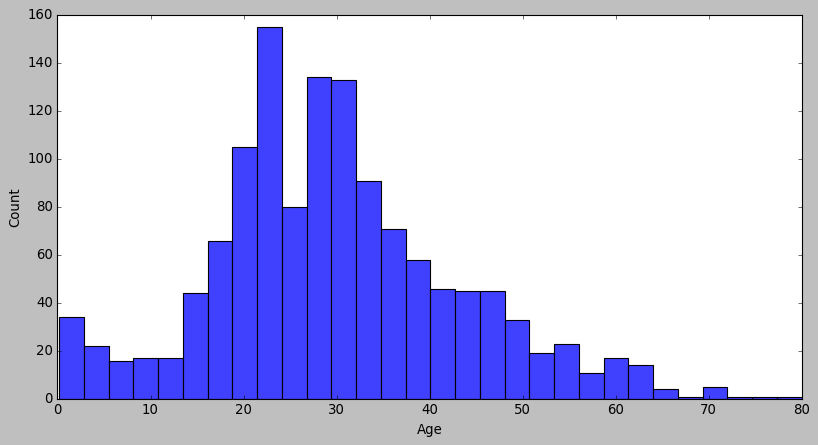

In [7]:
tabla_age = sns.histplot(data=titanic, x='Age')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

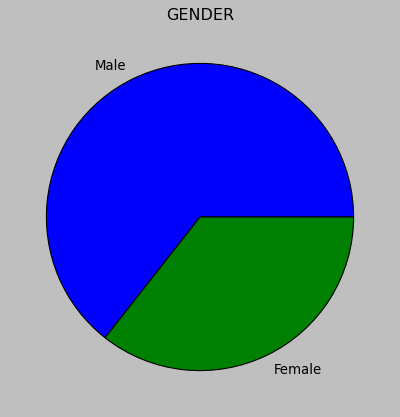

In [9]:
male_female = titanic['Gender'].value_counts()
plt.title('GENDER')
labels_pie = ['Male','Female']
tabla_activity = plt.pie(male_female,
                        labels=labels_pie);


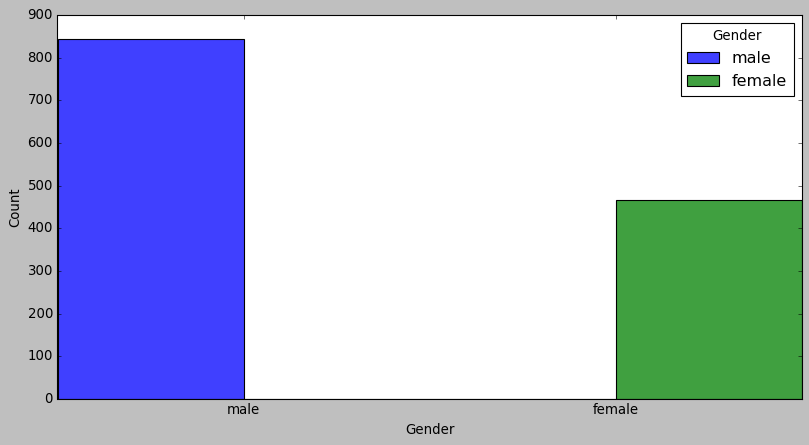

In [10]:
tabla_sex = sns.histplot(data=titanic, x='Gender', 
                        hue='Gender', 
                        multiple='dodge')

#### Use the appropriate plot to visualize the column `Pclass` 


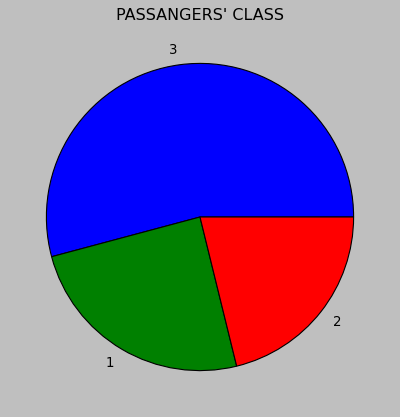

In [18]:
clases = titanic['Pclass'].value_counts()
plt.title("PASSANGERS' CLASS")
labels_pie = ['3','1','2']
tabla_activity = plt.pie(clases,
                        labels=labels_pie);


#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

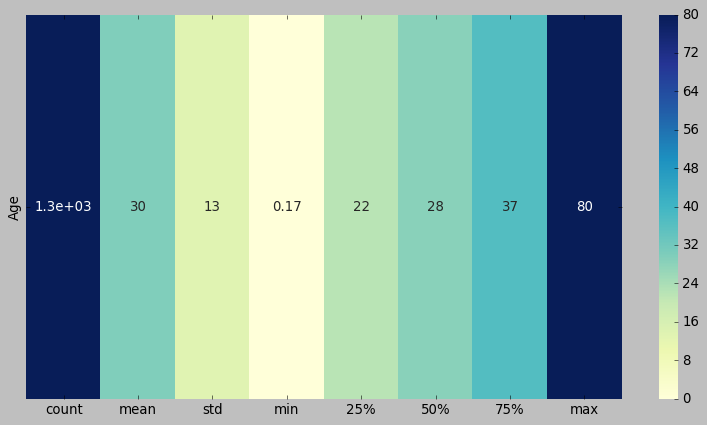

In [32]:
statistics_age = pd.DataFrame(titanic['Age']).describe().T
sns.heatmap(statistics_age,
            cmap = "YlGnBu",
           annot = True,
            vmin=0, vmax=80);

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

In [ ]:
#your code here


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [ ]:
#your code-1st way


In [ ]:
# your code-2nd way


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [ ]:
#your code here


#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [ ]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [ ]:
#your code here
